In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")
import scipy as sp
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from datetime import datetime

In [22]:
exec(open("../../header.py").read())

# Import data

In [23]:
# read in data and replace nans
data = pd.read_csv(raw_root('risk_factors_cervical_cancer.csv')).\
    replace('?', np.nan)

# Clean data

In [24]:
# impute, default is mean
my_imputer = SimpleImputer()
data_final = pd.DataFrame(my_imputer.fit_transform(data))
data_final.columns= data.columns


In [25]:
# all the target variables, i only use Biopsy
targets = ['Hinselmann', 'Schiller','Citology','Biopsy']

In [26]:
# split data
X = data_final.loc[:, ~data_final.columns.isin(targets)]
y = data_final['Biopsy']

# Fit model

In [27]:
# fit RF
rf = RandomForestClassifier(n_estimators = 500)
rf.fit(X, y)

RandomForestClassifier(n_estimators=500)

In [28]:
X.head(2)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0


In [29]:
print(f"Out of {len(y)} y-values, there are {np.sum(y == 1)} 1s and {np.sum(y == 0)} 0s")

Out of 858 y-values, there are 55 1s and 803 0s


In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr = LogisticRegression()
lr.fit(X, y)

C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Use class

In [40]:
ice = ICE("binary")

In [41]:
ice.fit_single_feature(X, rf, "Age")

Fit Age in 1 seconds


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Age ICE Plot'}, xlabel='Age', ylabel='Predicted Probability'>)

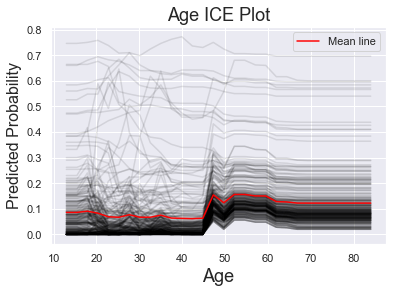

In [42]:
ice.plot_single_feature("Age")

In [43]:
ice.fit_single_feature(X, lr, "Age")

Fit Age in 1 seconds


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Age ICE Plot'}, xlabel='Age', ylabel='Predicted Probability'>)

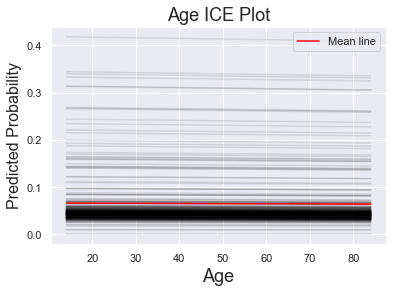

In [44]:
ice.plot_single_feature("Age")

In [33]:
ice.fit_single_feature(X, rf, "Smokes")

ValueError: Bin edges must be unique: array([0., 0., 0., 0., 1.]).
You can drop duplicate edges by setting the 'duplicates' kwarg

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Age ICE Plot'}, xlabel='Age', ylabel='Predicted Probability'>)

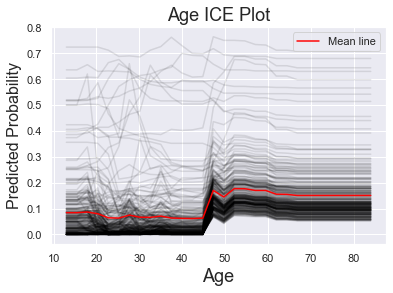

In [15]:
ice.plot_single_feature("Smokes")